<h2><strong>Pulsar Star Classification Using High Time Resolution Universe Survey Data with Machine Learning Algorithms</strong></h2><br>
<strong><i>Author: Mesuga, Reymond R.</i></strong><br>
<a href="https://github.com/Rey-commits" target="_blank">GitHub</a> | <a href="https://www.linkedin.com/in/reymond-r-21410/" target="_blank">LinkedIn</a> | <a href="https://rey-commits.web.app/" target="_blank">Website</a>

In [1]:
from IPython.display import YouTubeVideo

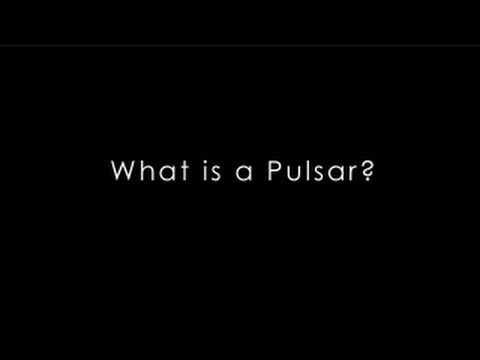

In [2]:
YouTubeVideo('gjLk_72V9Bw', width=800, height=300)

<strong>About the Dataset</strong><br>
The dataset was gathered from a Kaggle repository entitled <a href="https://www.kaggle.com/brsdincer/pulsar-classification-for-class-prediction">Pulsar Classification For Class Prediction</a> published by Baris Dincer. This dataset contains the data of pulsar star candidates collected during the High Time Resolution Universe survey. Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the interstellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. In particular, classification systems are widely adopted, which treat the candidate data sets as binary classification problems.

<strong>Attribute information:</strong><br>
Each candidate is described by 8 continuous variables and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. The remaining four variables are similarly obtained from the DM-SNR curve. These are summarised below:

<ol>
    <li>Mean of the integrated profile.</li>
    <li>Standard deviation of the integrated profile.</li>
    <li>Excess kurtosis of the integrated profile.</li>
    <li>Skewness of the integrated profile.</li>
    <li>Mean of the DM-SNR curve.</li>
    <li>Standard deviation of the DM-SNR curve.</li>
    <li>Excess kurtosis of the DM-SNR curve.</li>
    <li>Skewness of the DM-SNR curve.</li>
    <li>Class</li>
</ol>

Descriptions courtesy of Ustav Murarka:
<ul>
    <li>Integrated Pulse Profile: Each pulsar produces a unique pattern of pulse emission known as its pulse profile. It is like a fingerprint of the pulsar. It is possible to identify pulsars from their pulse profile alone. But the pulse profile varies slightly in every period. This makes the pulsar hard to detect. This is because their signals are non-uniform and not entirely stable overtime. However, these profiles do become stable, when averaged over many thousands of rotations.</li>
    <li>DM-SNR Curve: Radio waves emitted from pulsars reach earth after traveling long distances in space which is filled with free electrons. Since radio waves are electromagnetic in nature, they interact with these electrons, this interaction results in slowing down of the wave. The important point is that pulsars emit a wide range of frequencies, and the amount by which the electrons slow down the wave depends on the frequency. Waves with higher frequency are sowed down less as compared to waves with higher frequency. i.e. lower frequencies reach the telescope later than higher frequencies. This is called dispersion.</li>
    <li>Dataset Summary:<br>
        17,898 total examples.<br>
1,639 positive examples.<br>
16,259 negative examples.<br>

</li>
</ul>


<strong>Importing the Required Libraries</strong>

In [3]:
import plotly.express as px
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<strong>Downloading the Data</strong><br>
The dataset is available at https://www.kaggle.com/brsdincer/pulsar-classification-for-class-prediction .


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. 

In [8]:
od.download("https://www.kaggle.com/brsdincer/pulsar-classification-for-class-prediction")

  0%|          | 0.00/771k [00:00<?, ?B/s]

100%|██████████| 771k/771k [00:00<00:00, 2.13MB/s]

The dataset is downloaded and extracted to the folder `pulsar-classification-for-class-prediction`.

In [9]:
os.listdir("pulsar-classification-for-class-prediction")

['Pulsar.csv']

The file `Pulsar.csv` contains the data. Let's load it into a Pandas dataframe.

In [10]:
raw_df = pd.read_csv("pulsar-classification-for-class-prediction/Pulsar.csv")
raw_df

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


As shown on the info above. there are no missing values in the dataset.

## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:

- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/aakashns/interactive-visualization-plotly
- https://jovian.ai/aakashns/dataviz-cheatsheet

<AxesSubplot:title={'center':'No. of Data for Pulsar and Non-Pulsar'}, xlabel='Class', ylabel='count'>

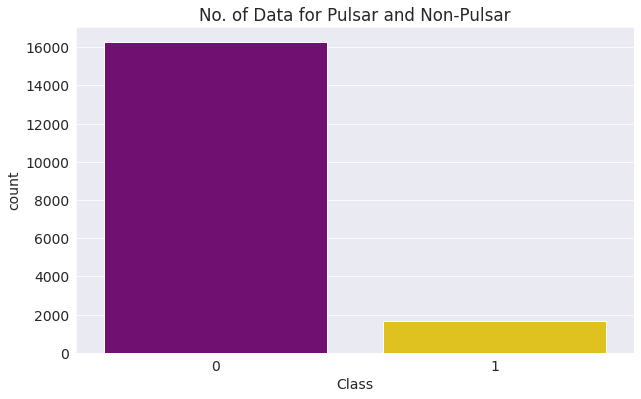

In [19]:
plt.title("No. of Data for Pulsar and Non-Pulsar")
sns.countplot(x=raw_df.Class, palette=['purple','gold'])

<AxesSubplot:xlabel='Class', ylabel='Mean_Integrated'>

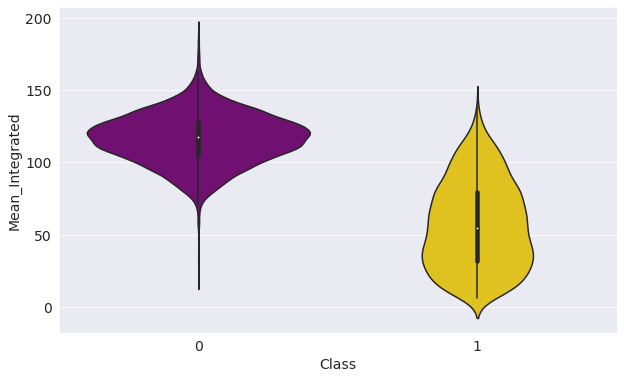

In [21]:
sns.violinplot(x="Class", y="Mean_Integrated", data=raw_df, palette=['purple','gold'])

<AxesSubplot:xlabel='Class', ylabel='SD'>

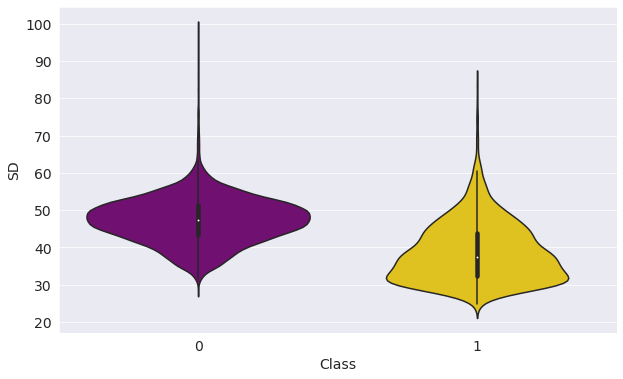

In [22]:
sns.violinplot(x="Class", y="SD", data=raw_df, palette=['purple','gold'])

<AxesSubplot:xlabel='Class', ylabel='EK'>

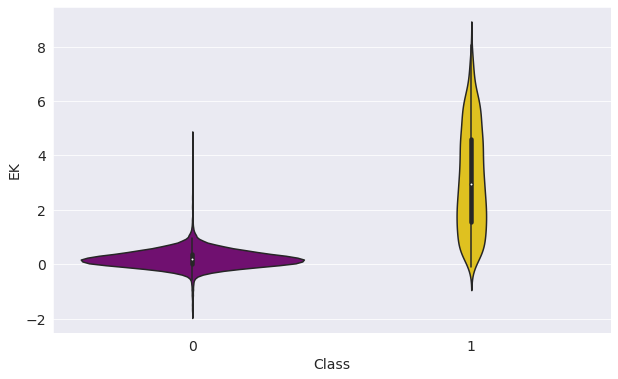

In [23]:
sns.violinplot(x="Class", y="EK", data=raw_df, palette=['purple','gold'])

<AxesSubplot:xlabel='Class', ylabel='Skewness'>

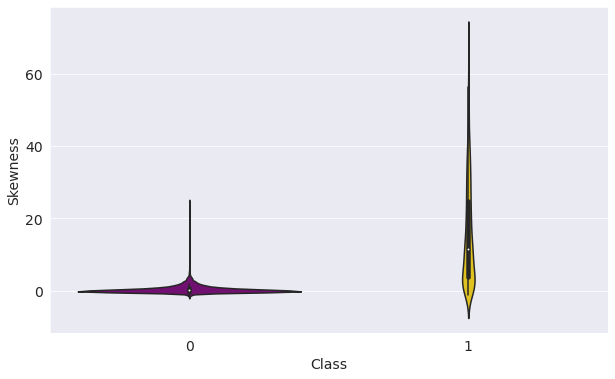

In [24]:
sns.violinplot(x="Class", y="Skewness", data=raw_df, palette=['purple','gold'])

<AxesSubplot:xlabel='Class', ylabel='Mean_DMSNR_Curve'>

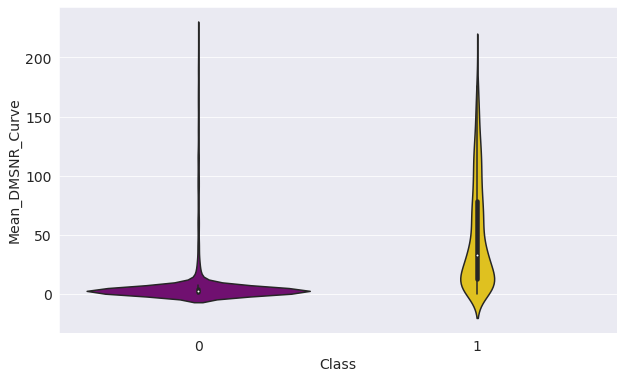

In [25]:
sns.violinplot(x="Class", y="Mean_DMSNR_Curve", data=raw_df, palette=['purple','gold'])

<AxesSubplot:xlabel='Class', ylabel='SD_DMSNR_Curve'>

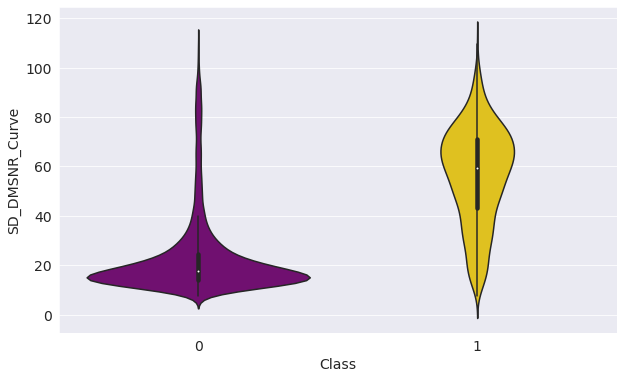

In [26]:
sns.violinplot(x="Class", y="SD_DMSNR_Curve", data=raw_df, palette=['purple','gold'])

<AxesSubplot:xlabel='Class', ylabel='EK_DMSNR_Curve'>

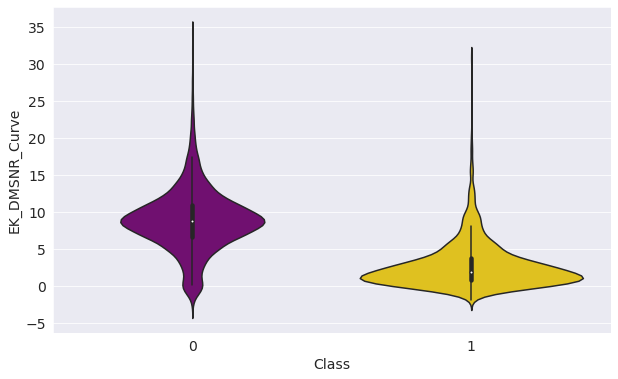

In [27]:
sns.violinplot(x="Class", y="EK_DMSNR_Curve", data=raw_df, palette=['purple','gold'])

<AxesSubplot:xlabel='Class', ylabel='Skewness_DMSNR_Curve'>

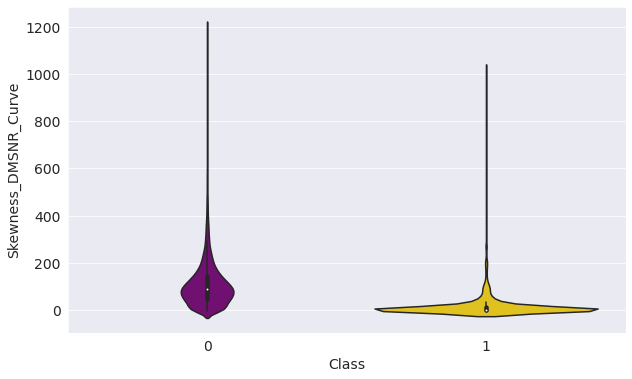

In [28]:
sns.violinplot(x="Class", y="Skewness_DMSNR_Curve", data=raw_df, palette=['purple','gold'])

Text(0.5, 1.0, 'Correlation Matrix')

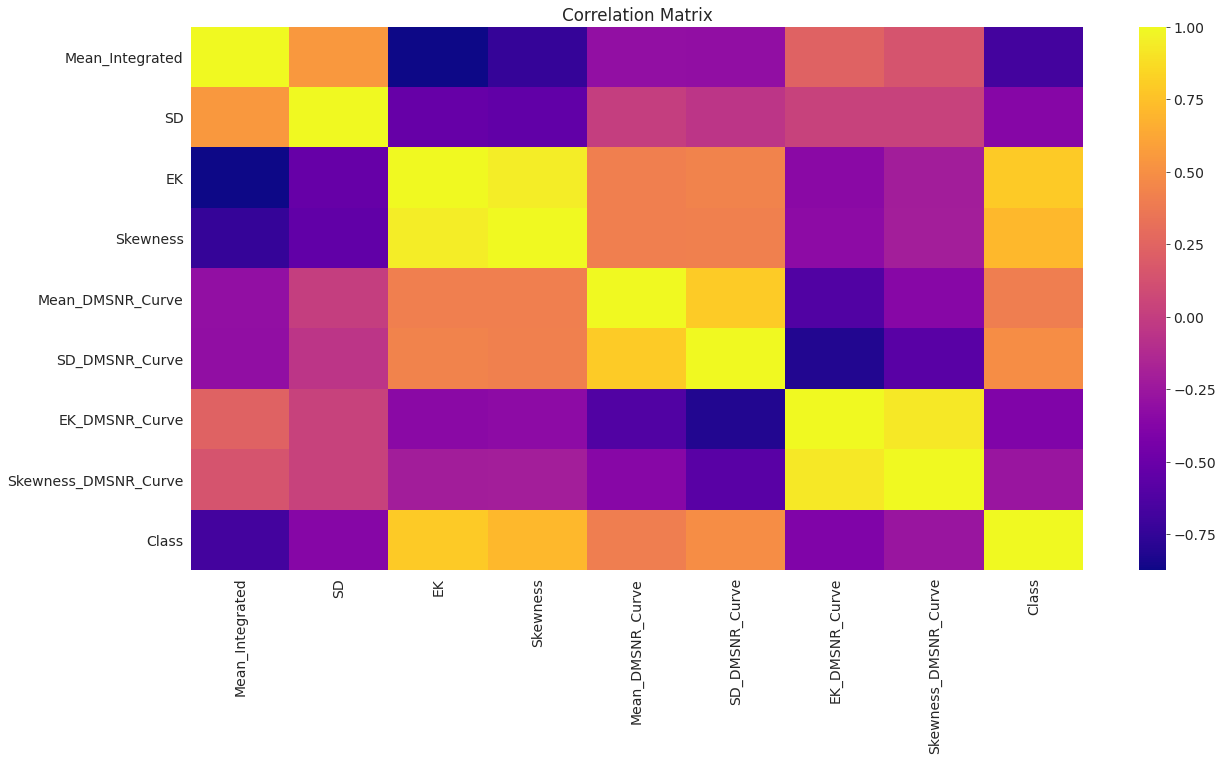

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(raw_df.corr(), ax=ax, cmap="plasma")
plt.title("Correlation Matrix")

In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [30]:
from sklearn.model_selection import train_test_split

In [40]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.1, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.11112, random_state=42)

In [41]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (14318, 9)
val_df.shape : (1790, 9)
test_df.shape : (1790, 9)


<strong>Identifying Input and Target Columns</strong>

In [42]:
input_cols = list(train_df.columns)[0:-1]
target_col = "Class"

In [43]:
print("input_cols =", input_cols)
print("------------------------------")
print("target_col =", target_col)

input_cols = ['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve', 'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve']
------------------------------
target_col = Class


In [44]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [45]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [46]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [47]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
numeric_cols, len(numeric_cols)

(['Mean_Integrated',
  'SD',
  'EK',
  'Skewness',
  'Mean_DMSNR_Curve',
  'SD_DMSNR_Curve',
  'EK_DMSNR_Curve',
  'Skewness_DMSNR_Curve'],
 8)

In [48]:
raw_df[numeric_cols].describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837


<strong>Scaling the Numerical Values on Each Column</strong><br>
Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges. Note that only scale the inputs and not the targets.

Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [51]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[5.8125,
 24.77204176,
 -1.876011181,
 -1.791885981,
 0.213210702,
 7.370432165,
 -3.139269611,
 -1.976975603]

In [52]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[192.6171875,
 98.77891067,
 8.069522046,
 68.10162173,
 223.3921405,
 110.6422106,
 34.53984419,
 1191.000837]

We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.

In [53]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [54]:
train_inputs.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
count,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000
mean,0.563554,0.294109,0.236702,0.050883,0.055795,0.183992,0.303585,0.089577
std,0.136977,0.092321,0.106654,0.088219,0.132308,0.189370,0.119877,0.089511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.509149,0.237987,0.191358,0.022936,0.007650,0.068256,0.236205,0.030745
50%,0.585212,0.299733,0.211024,0.028476,0.011633,0.107668,0.306762,0.070980
75%,0.649607,0.354385,0.236301,0.038876,0.023597,0.204186,0.367164,0.118478
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Saving Processed Data to Disk

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [55]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (14318, 8)
train_targets: (14318,)
val_inputs: (1790, 8)
val_targets: (1790,)
test_inputs: (1790, 8)
test_targets: (1790,)


In [56]:
!pip install pyarrow --quiet

In [58]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [59]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 11.3 ms, sys: 0 ns, total: 11.3 ms
Wall time: 10.6 ms


We can read the data back using `pd.read_parquet`.

In [60]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 87.6 ms, sys: 78.5 ms, total: 166 ms
Wall time: 738 ms


Let's verify that the data was loaded properly.

In [61]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (14318, 8)
train_targets: (14318,)
val_inputs: (1790, 8)
val_targets: (1790,)
test_inputs: (1790, 8)
test_targets: (1790,)


<strong>Training the Models</strong>

<strong>First Model Training and Evaluation: Random Forest Classifier Model</strong>

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
RFC_model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [110]:
import time
training_start = time.perf_counter()
RFC_model.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
train_preds = RFC_model.predict(train_inputs)
test_preds = RFC_model.predict(test_inputs)
val_preds = RFC_model.predict(val_inputs)
prediction_end = time.perf_counter()

test_accuracy_RFC = (test_preds == test_targets).sum().astype(float)/len(test_preds)*100
val_accuracy_RFC = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
train_accuracy_RFC = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100

RFC_train_time = training_end - training_start
RFC_prediction_time = prediction_end - prediction_start
print("RFC's test accuracy is: %3.2f" % (test_accuracy_RFC))
print("RFC's validation accuracy is: %3.2f" % (val_accuracy_RFC))
print("RFC's train accuracy is: %3.2f" % (train_accuracy_RFC))
print("Time consumed for training: %4.3f" % (RFC_train_time))
print("Time consumed for prediction: %6.5f seconds" % (RFC_prediction_time))


RFC's test accuracy is: 71.04
RFC's validation accuracy is: 67.07
RFC's train accuracy is: 100.00
Time consumed for training: 0.444
Time consumed for prediction: 0.64486 seconds


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

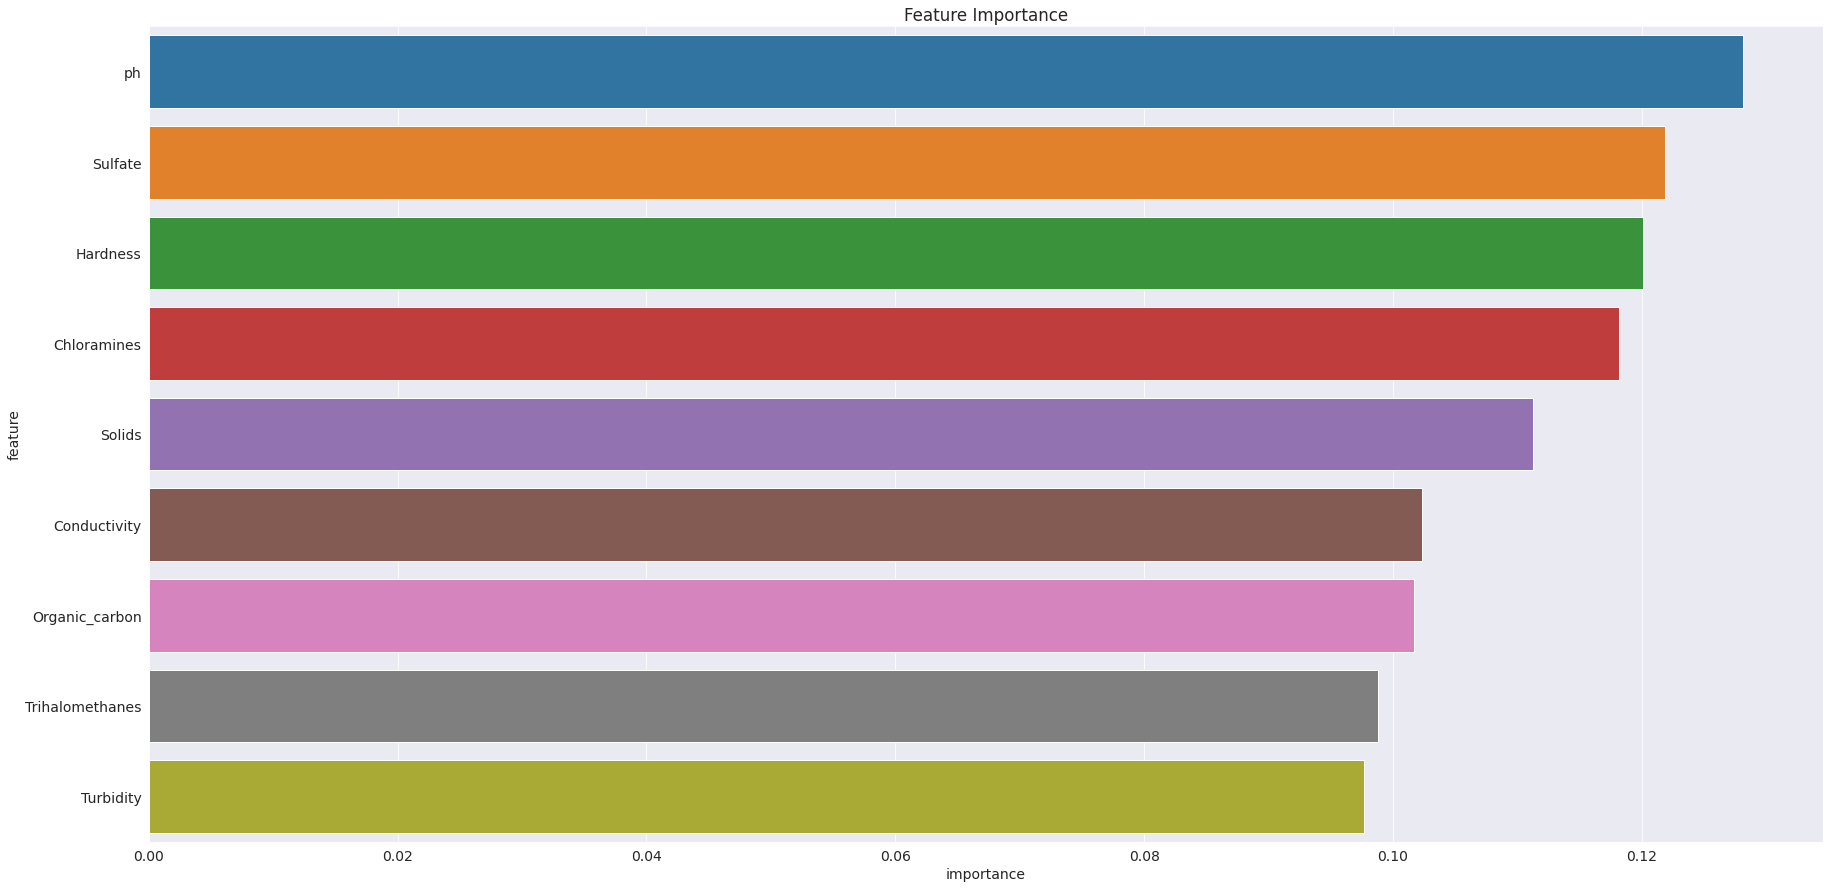

In [58]:
plt.figure(figsize=(30,15))

importance_df = pd.DataFrame({
    "feature": train_inputs.columns,
    "importance": RFC_model.feature_importances_
}).sort_values("importance", ascending=False)
plt.title("Feature Importance")
sns.barplot(data=importance_df.head(10), x="importance", y="feature")

In [59]:
importance_df

,feature,importance
0,ph,0.128130
4,Sulfate,0.121830
1,Hardness,0.120122
3,Chloramines,0.118164
2,Solids,0.111233
5,Conductivity,0.102341
6,Organic_carbon,0.101711
7,Trihalomethanes,0.098831
8,Turbidity,0.097637
